# Demonstration of our algorithm running over a sampled instance from Gaussian process with one dimensional input.

## import relevant packages

In [95]:
import sys
sys.path.append('..')
import util
from popbo import POPBO
import sigma
import numpy as np
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Construct the problem configurations

In [96]:
np.random.seed(3)
config = util.get_config('GP_sample_func', problem_dim=1)
popbo = POPBO(config, y_lb=-5, y_ub=5)
f = config['obj']

[[ 2.53142993]
 [ 0.31744681]
 [ 0.2812075 ]
 [ 2.86324211]
 [-0.50206966]
 [-0.52029319]
 [-1.32332505]
 [-0.30103314]
 [-2.55538644]
 [ 2.41711339]]
  index  |  rbf.lengthscale  |  constraints  |  priors
  [0]    |       1.00000000  |      +ve      |        


## Initialize the algorithm

In [97]:
x_prime = [np.random.rand()]
x = popbo.query_new_point(x_prime=x_prime)

[7.16844106] with opt improvement 6.348864544859847, real 6.348864718650384


## repeatedly and interatively run the following block to see how our algorithm works

[1.90917488] with opt improvement 3.1233755289524243, real -0.10416134603983784
Estimated best x: [5.803113505661815],  with regret 0.7644216892207862.
Step 21: norm 1.4964416793748239, LL value -7.522636585617981,avg -0.35822078979133243.
New sampled point: [1.9091748791293879], with objective value -0.4335361478753878.
[5.72348116] with opt improvement 5.629631924227597, real 5.325654591873484
Estimated best x: [5.803113505661815],  with regret 0.7644216892207862.
Step 22: norm 1.4964416810746228, LL value -7.546916813561097,avg -0.34304167334368624.
New sampled point: [5.723481155255953], with objective value 2.2090209868164714.
[4.23933068] with opt improvement 1.211257117737855, real 1.2153402677910947
Estimated best x: [5.723481155255953],  with regret 0.6295616663755239.
Step 23: norm 1.4964416800255833, LL value -8.14985609022336,avg -0.35434156914014603.
New sampled point: [4.239330681400598], with objective value 2.1650281557616218.
[5.42880473] with opt improvement 0.9938496

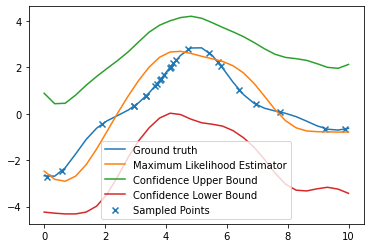

In [106]:
plot_uncer = True  # set to false if you do not want to plot to save time
sample_per_run = 5
for k in range(sample_per_run):
    x_prime = x
    x = popbo.query_new_point(x_prime=x_prime)
    one = sigma.pref_oracle(f(x), f(x_prime))
    popbo.add_new_data(x_prime=x_prime, x=x, one=one)
    print(f'New sampled point: {x}, with objective value {f(x)}.')

if plot_uncer:
    num_data = popbo.num_data
    x_grid = popbo.config['x_grid']
    max_ll_list = []
    upb_list = []
    lpb_list = []
    f_list = []
    for x in x_grid:
        max_ll_list.append(popbo.get_maxLL_min_norm_inter(x))
        upb_list.append(popbo.get_upper_bound(x, beta=0.2*np.sqrt(num_data)))
        lpb_list.append(popbo.get_lower_bound(x, beta=0.2*np.sqrt(num_data)))
        f_list.append(f(x))
    sampled_f_list = []
    for x in popbo.x_list:
        sampled_f_list.append(f(x))
    
    plt.figure()
    plt.plot(x_grid, f_list)
    plt.plot(x_grid, max_ll_list)
    plt.plot(x_grid, upb_list)
    plt.plot(x_grid, lpb_list)
    plt.scatter(popbo.x_list, sampled_f_list, marker='x')
    plt.legend(['Ground truth', 'Maximum Likelihood Estimator', 'Confidence Upper Bound', 'Confidence Lower Bound', 'Sampled Points'])



## plot the regret evolution

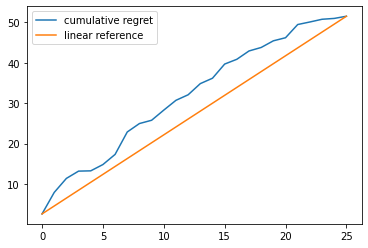

In [107]:
x_list = [popbo.x_prime_list[0]] + popbo.x_list
regret = [popbo.config['opt_val'] - f(x) for x in x_list]
plt.plot(np.cumsum(regret))
plt.plot([0, popbo.num_data], [regret[0], sum(regret)])
plt.legend(['cumulative regret', 'linear reference'])
#plt.plot(opbo.estimated_best_x_list)